## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

**Q0.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting? 
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. **Difference between regression and classification**: Regression predicts continuous numerical values, while classification predicts discrete class labels. For example, regression can estimate a person's salary, whereas classification can determine if an email is spam or not.

2. **Confusion table**: A confusion table is a summary of prediction results for a classification problem, displaying true positives, true negatives, false positives, and false negatives. It helps us understand the model's performance in terms of accuracy, precision, recall, and the types of errors made.

3. **SSE (Sum of Squared Errors)**: SSE quantifies the total deviation of the predicted values from the actual values in a regression model, providing insight into how well the model fits the data. A lower SSE indicates a better fit.

4. **Overfitting and underfitting**: Overfitting occurs when a model learns noise in the training data and performs poorly on unseen data, while underfitting happens when a model is too simple to capture the underlying patterns in the data. Both reduce the model's generalization ability.

5. **Importance of splitting data and evaluating on the test set**: Splitting data into training and testing sets prevents overfitting by ensuring that the model is evaluated on unseen data, thus providing a more accurate measure of its performance. Choosing \( k \) based on test set accuracy or SSE ensures that the selected model complexity generalizes well rather than just fitting the training data.

6. **Class label vs. probability distribution in classification**: Reporting a class label provides a clear decision but may lose information about uncertainty, while a probability distribution conveys confidence levels about predictions, enabling better decision-making in uncertain cases. However, probabilities can complicate interpretation and may require thresholding to convert them back to class labels.

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [50]:
import pandas as pd

data = pd.read_csv('./data/USA_cars_datasets.csv')

data = data[['price', 'year', 'mileage']]

na_counts = data.isna().sum()
print("NA Counts:\n", na_counts)
print("There are no missing values.")
print("Dimensions of the data:", data.shape)
print(data.describe())
data.head()



NA Counts:
 price      0
year       0
mileage    0
dtype: int64
There are no missing values.
Dimensions of the data: (2499, 3)
              price         year       mileage
count   2499.000000  2499.000000  2.499000e+03
mean   18767.671469  2016.714286  5.229869e+04
std    12116.094936     3.442656  5.970552e+04
min        0.000000  1973.000000  0.000000e+00
25%    10200.000000  2016.000000  2.146650e+04
50%    16900.000000  2018.000000  3.536500e+04
75%    25555.500000  2019.000000  6.347250e+04
max    84900.000000  2020.000000  1.017936e+06


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


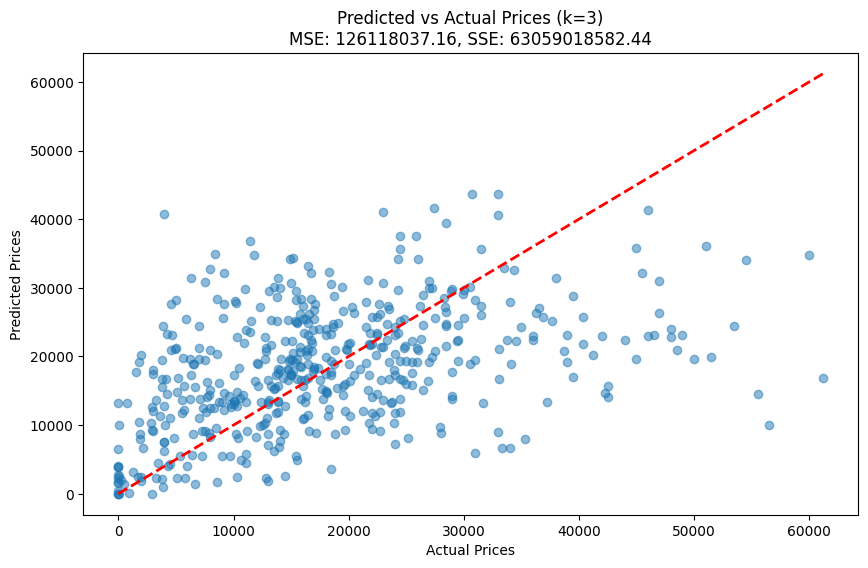

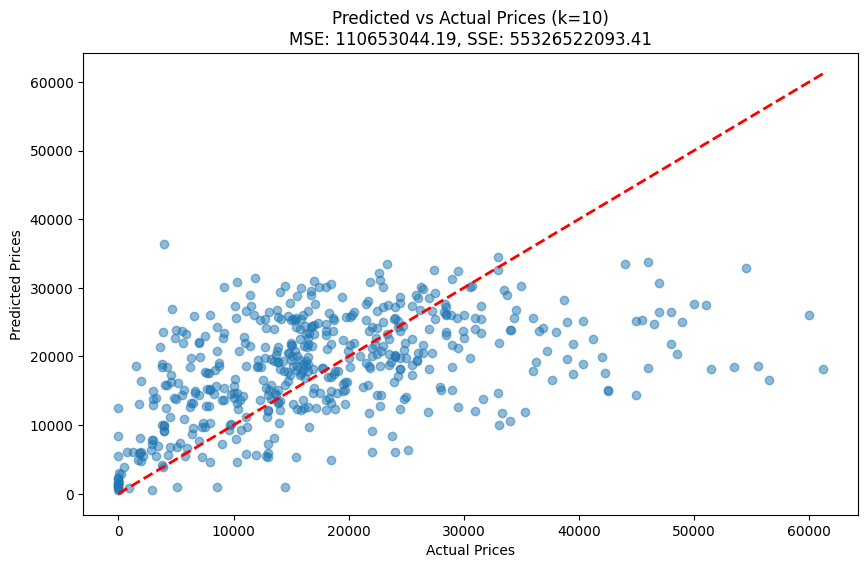

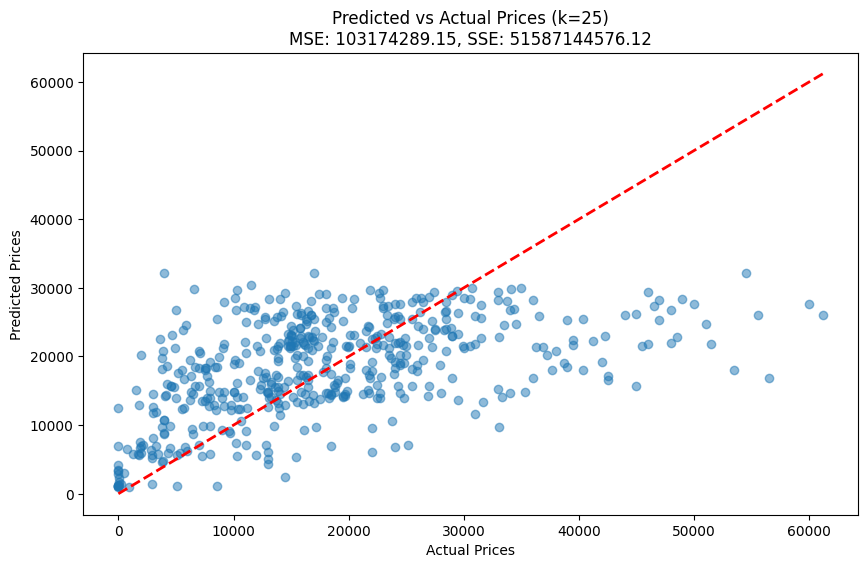

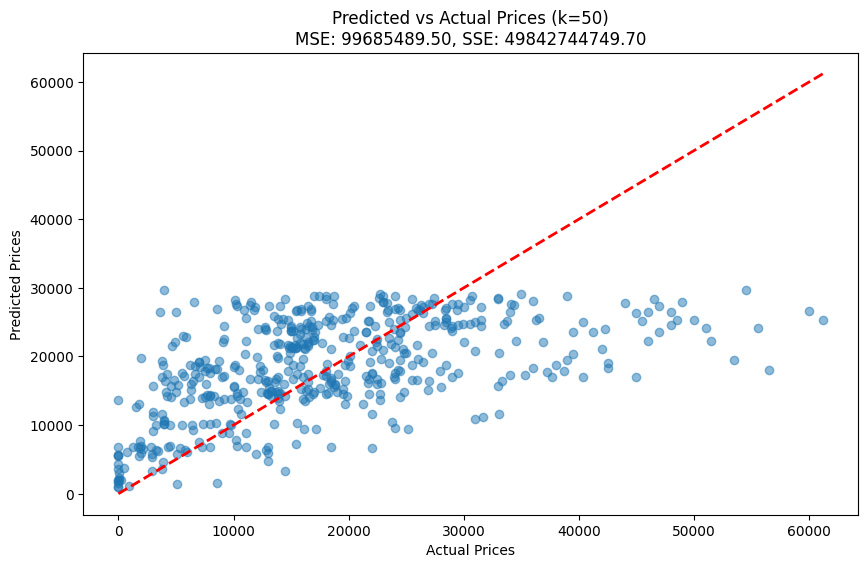

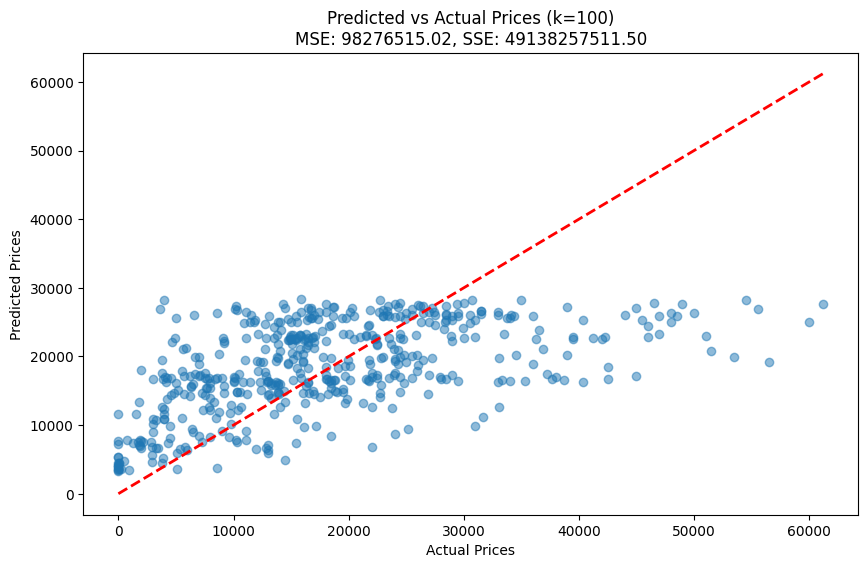

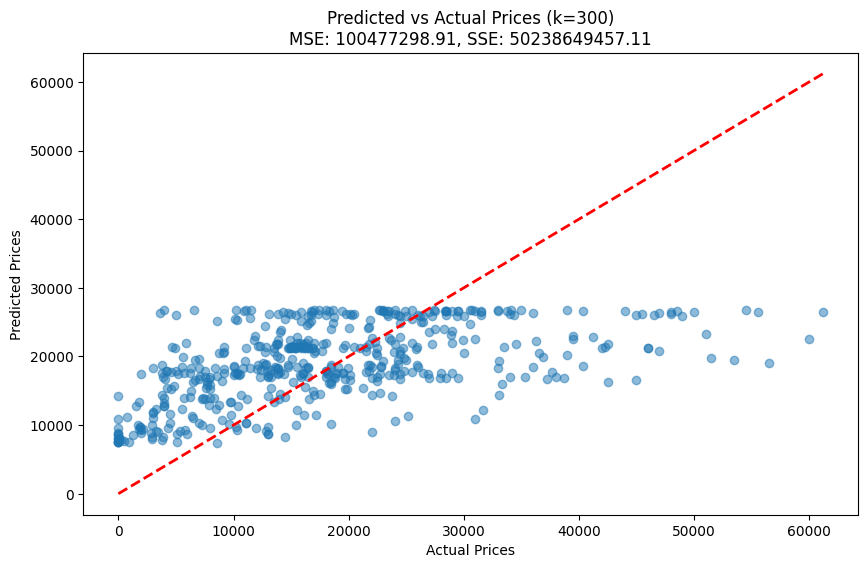

Optimal k: 77


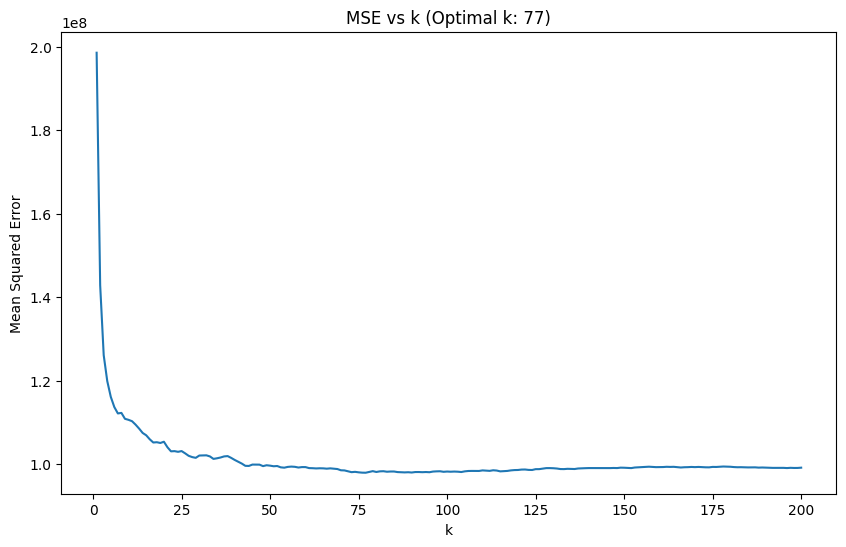

In [52]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def maxmin_normalize(column):
    return (column - column.min()) / (column.max() - column.min())

data['year'] = maxmin_normalize(data['year'])
data['mileage'] = maxmin_normalize(data['mileage'])

X = data[['year', 'mileage']]
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


def plot_predictions(k, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    sse = mse * len(y_test)  
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f'Predicted vs Actual Prices (k={k})\nMSE: {mse:.2f}, SSE: {sse:.2f}')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.show()

k_values = [3, 10, 25, 50, 100, 300]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    plot_predictions(k, y_test, y_pred)

k_range = range(1, 201)
mse_results = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_results.append(mse)

optimal_k = k_range[np.argmin(mse_results)]
print(f'Optimal k: {optimal_k}')

plt.figure(figsize=(10, 6))
plt.plot(k_range, mse_results)
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.title(f'MSE vs k (Optimal k: {optimal_k})')
plt.show()

knn_optimal = KNeighborsRegressor(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
y_pred_optimal = knn_optimal.predict(X_test)

Patterns Observed:

As 𝑘 increases, the model becomes more generalized and smooths out noise, leading to higher bias but lower variance. The range in predicted prices flattens.
Lower values of 𝑘 may capture more of the training data's noise (overfitting), while higher values may oversimplify the model (underfitting).

The optimal k for the dataset is around 77. As we vary k, we observe several patterns in the plots of predicted versus actual prices:
For low k values (3, 10, 25):
- The model is underfitting.
- Predictions show high variance and low precision.
- The scatter plots display a wide spread of predictions, often deviating significantly from the ideal line.
For k values close to optimal (50 and 100):
- The predictions are closer to the actual values.
- The scatter plots show a more balanced distribution around the ideal line.
For high k values (300):
- The model is overfitting.
- Notice horizontal bunching in the scatter plot, where common answers start to exert a lot of influence on the predictions.

As k increases, we also observe that:
- The range of predictions shrinks.
- High outlier values become less influential.
- Predictions tend to shrink towards average values.
This behavior demonstrates the trade-off between underfitting (at low k) and overfitting (at high k). The optimal k of 77 represents the best balance, capturing the underlying patterns in the data without being overly sensitive to individual data points or noise.